<IPython.core.display.Javascript object>


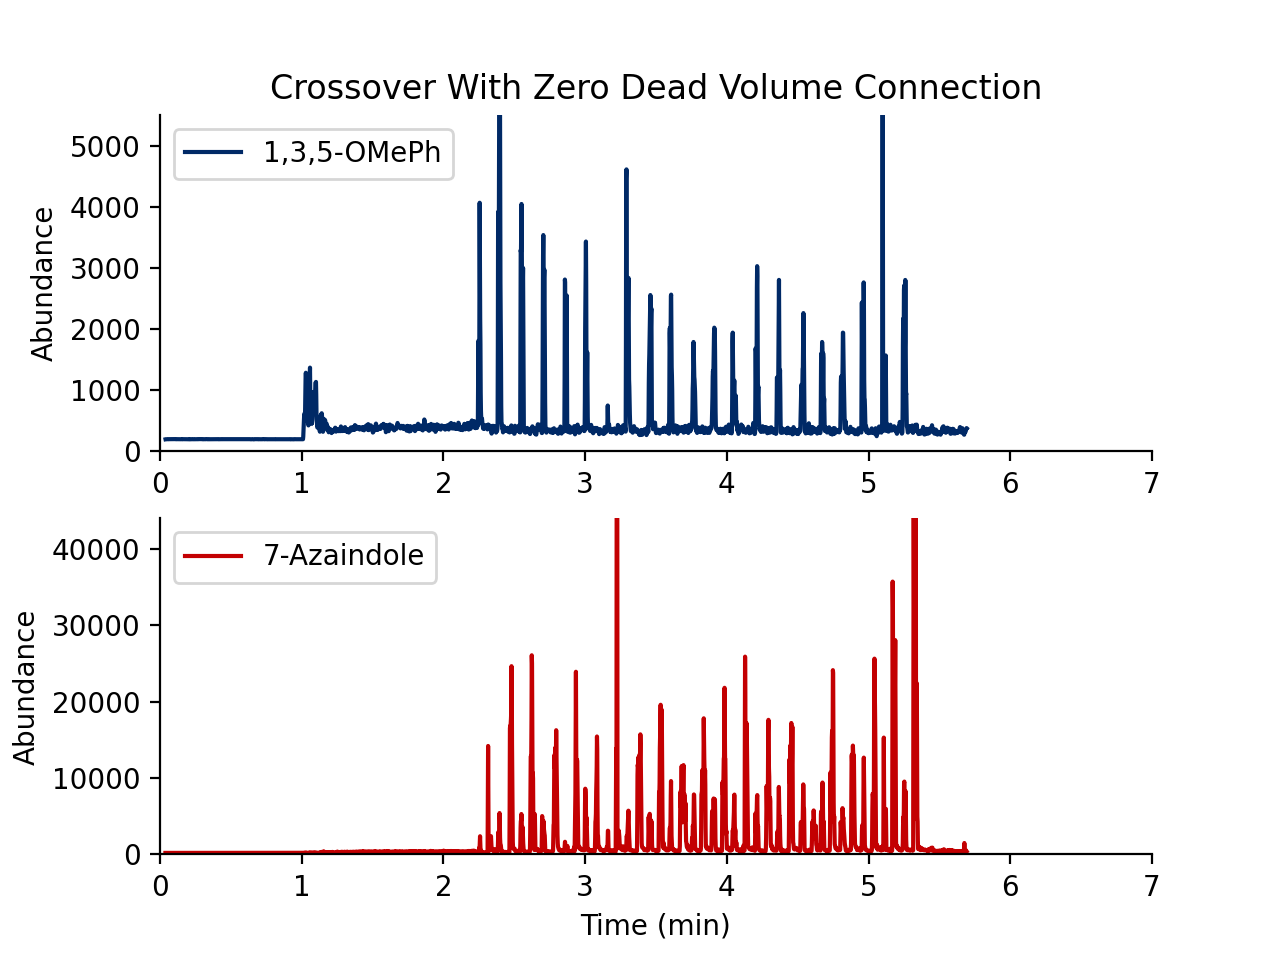

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation, writers

mpl.rcParams['animation.ffmpeg_path'] = "/Users/alanwortman/Desktop/ffmpeg 3"

df = pd.read_csv('/Users/alanwortman/Desktop/Grad School/Stephenson/Droplet Microfluidics/Experimental Data/Crossover Experiments/SHORT-FS-WITH-PFA-CARRYOVER-combined.csv')

x1 = df['1,3,5-OMePh time']
y1 = df['1,3,5-OMePh signal']
x2 = df['7-Azaindole time']
y2 = df['7-Azaindole signal']

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)


ax1.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

def animate(i):
    ax1.clear()
    ax2.clear()
    ax1.plot(x1[:i], y1[:i], color = '#002966', label = '1,3,5-OMePh')
    ax2.plot(x2[:i],y2[:i], color = '#c30002', label = '7-Azaindole')
    ax1.set_title('Crossover With Zero Dead Volume Connection')

    ax1.legend(loc = 'upper left')
    ax1.set_xlim(0,7)
    ax1.set_ylim(0,5500)
    ax1.set_ylabel('Abundance')

  
    
    ax2.legend(loc = 'upper left')
    ax2.set_xlim(0,7)
    ax2.set_ylim(0,44000)
    ax2.set_xlabel('Time (min)')
    ax2.set_ylabel('Abundance')
    
    
    
# the default number of frames is 100 which will result in a video which comes out too short if saved.
# to get the full length it is necessary to increase the number of frames with save_count
ani = animation.FuncAnimation(fig, animate, interval = 1, save_count = 4000)


# plt.show()


# this saves the animation as an .mp4 file. Increasing the bit rate or number of frames will increase the file size
writer = animation.FFMpegWriter(fps=30, metadata=dict(artist='Me'), bitrate = 1800)
ani.save('PicoClear_Union_Carryover.mp4', writer=writer, dpi = 250) 
# increasing the dpi will increase the quality of the image


